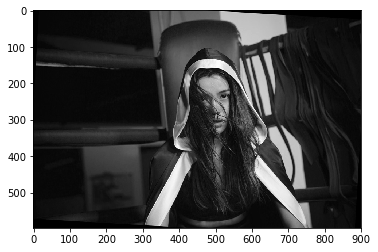

(597, 900)

In [61]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
KernelSize = (41,41)
KernelLength = 41
filter_avg = np.ones(KernelSize)
f = misc.imread('fa.jpeg',mode='L')
plt.gray()
plt.imshow(f)
plt.show()
f.shape


In [62]:
half_kernel = int((KernelSize[0]-1)/2)

mask = np.ones(f.shape)
mask.shape


(597, 900)

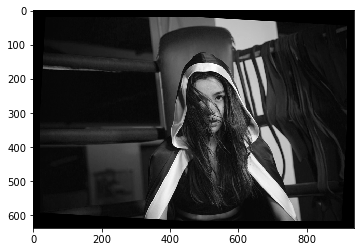

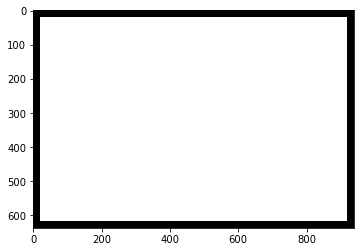

(637, 940) (637, 940)


In [63]:
a = np.arange(6)
a = a.reshape((2, 3))

def padwithtens(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector
mask = np.lib.pad(mask, half_kernel, padwithtens)
padding_f = np.lib.pad(f,half_kernel,padwithtens)
plt.imshow(padding_f)
plt.show()
plt.imshow(mask)
plt.show()
print(padding_f.shape,mask.shape)

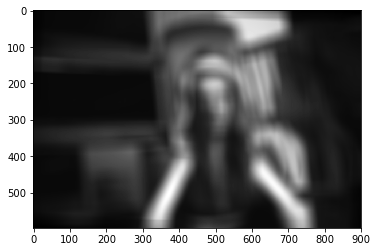

In [64]:
output = np.zeros(f.shape)
it = np.nditer(output, flags=['multi_index'],op_flags=['readwrite'])
while not it.finished:
    counter = np.sum(np.multiply(mask[it.multi_index[0]:it.multi_index[0]+KernelLength,it.multi_index[1]:it.multi_index[1]+KernelLength],filter_avg))
#     print(np.sum(np.multiply(mask[it.multi_index[0]:it.multi_index[0]+KernelLength,it.multi_index[1]:it.multi_index[1]+KernelLength],filter_avg)))
    it[0] = np.sum(np.multiply(padding_f[it.multi_index[0]:it.multi_index[0]+KernelLength,it.multi_index[1]:it.multi_index[1]+KernelLength],filter_avg))/counter
    it.iternext()
plt.imshow(output)
plt.show()